In [24]:
import torch

In [25]:
# introducao pytorch - tensores

# cria tensor matriz 2 x 3 com valores vazios
x = torch.empty(2, 3)
x

tensor([[1.4793e-05, 2.0683e+20, 1.6993e-04],
        [7.9356e+17, 1.8392e+25, 3.5969e-41]])

In [26]:
x = torch.ones(3, 2)
x.dtype # por padrao tensores tem tipos float32

torch.float32

In [27]:
x.size() # equivalente a shape

torch.Size([3, 2])

In [28]:
# outra maneira de criar tensores
array = [2.5, 0.1]
x = torch.tensor(array)
x

tensor([2.5000, 0.1000])

In [29]:
# broadcast de operacoes funciona aqui tambem
x = torch.rand(2, 2)
y = torch.rand(2, 2)
z = x+y # z = torch.add(x, y) tambem funciona

z

tensor([[1.0831, 0.9942],
        [0.6515, 0.6597]])

In [30]:
x = torch.ones(2, 2)
y = torch.rand(2, 2)

y.add_(x) # _ serve para fazer operacoes inplace

y

tensor([[1.5126, 1.4674],
        [1.5135, 1.0011]])

In [31]:
x = torch.rand(4, 2)
print(x)
print(x[:, 0]) # imprime todas linhas da primeira coluna apenas
print(x[1, 1].item()) # maneira de pegar elemento de um tensor de um elemento so

tensor([[0.1185, 0.7434],
        [0.2501, 0.1848],
        [0.5013, 0.0406],
        [0.5844, 0.2674]])
tensor([0.1185, 0.2501, 0.5013, 0.5844])
0.184839129447937


In [32]:
# reshape tensor
x = torch.rand(4, 4)
y = x.view(16) # transforma para uma unica dimensao de 16 valores
y

tensor([0.6718, 0.0094, 0.4299, 0.0488, 0.2084, 0.9743, 0.1422, 0.9726, 0.4022,
        0.1878, 0.0358, 0.2488, 0.7483, 0.1837, 0.8512, 0.3636])

In [33]:
# para determinar uma dimensao e deixar o pytorch escolher a outra 
# automaticamente para ajustar a quantidade de valores:
y = x.view(-1, 8) # -1 eh substituido por 2
y

tensor([[0.6718, 0.0094, 0.4299, 0.0488, 0.2084, 0.9743, 0.1422, 0.9726],
        [0.4022, 0.1878, 0.0358, 0.2488, 0.7483, 0.1837, 0.8512, 0.3636]])

In [34]:
# metodo para converter um tensor em array numpy
import numpy as np

a = torch.ones(4)
b = a.numpy()
b, type(b)

(array([1., 1., 1., 1.], dtype=float32), numpy.ndarray)

In [35]:
# modificar a modifica b, variaveis compartilham mesmo espaco na memoria

a.add_(1) # operacao inplace que incrementa valores
b

array([2., 2., 2., 2.], dtype=float32)

In [36]:
# para converter de numpy array para tensor
a = np.ones(5)
b = torch.from_numpy(a)
b # converta para tensor mas para float64 pois eh padrao do np.array

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [37]:
# em caso de gpu disponivel, tensor deve ser mandado para gpu
if torch.cuda.is_available():
    device = torch.devide("cuda")
    x = torch.ones(5, device=device)
    # funciona tambem mandar depois
    y = torch.zeros(5)
    y = y.to(device)
    z = x + y # operacao feita em gpu e z fica na gpu
    z.numpy() # gera erro pois numpy so opera na cpu
    # para voltar pra cpu
    z.to("cpu")

gradiente automatico ou diferenciacao automatica é o processo de achar o gradiente automaticamente que o torch faz

No exemplo abaixo, sempre que operações forem feitas usando x, pytorch cria grafo de computação

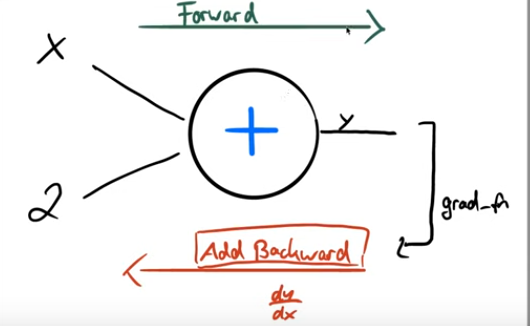

Algoritmo de backpropagation gradientes sao calculados (derivada parcial de y em relação a x - dy/dx)

grad_fn eh a função que calcula o gradiente, derivada

In [38]:

x = torch.ones(1, requires_grad=True)
y = x + 2

y.backward() # faz backpropagation e adiciona dy/dx em um atributo de x
# se tivessem mais variaveis adicionaria em todas elas

# dy/dx = 1; logo x.grad = 1
x.grad

tensor([1.])

In [39]:
x = torch.ones(1, requires_grad=True)
y = 2*x
z = y ** 2

# dz/dx = dz/dy * dy/dx = 2y * 2 = 4y = 8x; sendo x = 1, dz/dx = 8
z.backward()
x.grad

tensor([8.])

Backpropagation faz a operação da imagem abaixo, basicamente regra da cadeia

funcao l(y), funcao y(x)

O v deve ser passado caso o vetor z seja um tensor nao escalar com mais de uma dimensao

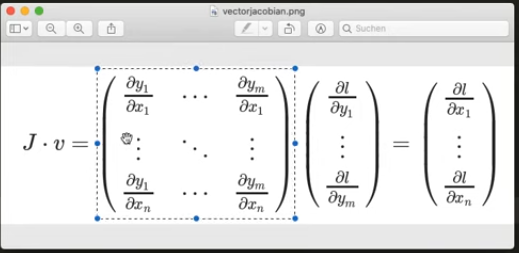

In [40]:
# equivalente ao array do np
# por padrao o tipo eh float32
x = torch.tensor(1., requires_grad=True) # requires_grad permite que operacoes sobre ele sao armazenadas 
x, x.dtype

y = 4*x**2
# calcula o gradiente da variavel y em relacao as variaveis que
# 1. foram usadas para calcular valor de y
# 2. possuam requires-grad=True
# 3. sao folhas do grafo de computacao (*)
y.backward() # executa backpropagator e popula em uma propriedade grad de x com seu gradiente (derivada de y em funcao de x)

# (*) variavel folha nao sao resultados de calculos de outras variaveis

dydx = x.grad
dydx

tensor(8.)

pytorch guarda apenas gradiente de variáveis folhas, mas caso um gradiente intermediário (derivada parcial) intermediária seja necessária por causa de funções compostas e regra da cadeia, pytorch guarda resultado apenas enquanto ele for necessário e depois descarta

Para poder ainda obter esse grad, usar retain_grad()

In [41]:
def func(x1, x2, x3, x4):

    y = x1 * x2 + x3**2 - x4/x2

    return y

# para saber como y varia (gradiente) em relacao a cada x ((f(x1, x2, x3, x4) = y))
def gradient(y, x1, x2, x3, x4):

    y.backward()
    grad = [x1.grad, x2.grad, x3.grad, x4.grad]

    return grad

x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

y = func(x1, x2, x3, x4)
grad = gradient(y, x1, x2, x3, x4)

grad

[tensor(3.), tensor(2.4444), tensor(2.), tensor(-0.3333)]

In [42]:
def y_func(x):

    return 3*x**2

def z_func(y):

    return y ** 4

# aplicacao de camadas
x = torch.tensor(2., requires_grad=True)
y = y_func(x)
z = z_func(y)

y.retain_grad()
z.backward() 

print(x.grad) # imprime gradiente final considerando duas camadas
print(y.grad) # nao funciona pois eh gerado a partir de x, nao sendo variavel folha

tensor(82944.)
tensor(6912.)


In [43]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(5., requires_grad=True)
z = x*y

# saved_other eh operador da esquerda e saved_self operador da direita, salvos para calculo do gradiente
print(z.grad_fn)
print(z.grad_fn._saved_other)
print(z.grad_fn._saved_self)


tensor(5., requires_grad=True)
tensor(2., requires_grad=True)


In [44]:
z.backward()
x.grad, y.grad

(tensor(5.), tensor(2.))

In [45]:
# outra maneira para poder controlar direcao do calculo do vetor gradiente
# permite mudar o peso
peso = torch.tensor([0.5, 0.1])


# dzdx = 5 -> 5 * 0.5 = 2.5 e 5 * 0.1 = 0.5
# mesma coisa feita em dzdy
dzdx, dzdy = z.grad_fn(peso)
print('derivadas', dzdx, dzdy)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:

# calcula o gradiente na direcao em que cresce mais
dzdx, dzdy = z.grad_fn(torch.tensor([1.]))
print('derivadas', dzdx, dzdy)

derivadas tensor([5.], grad_fn=<MulBackward0>) tensor([2.], grad_fn=<MulBackward0>)


problema de memoria pode surgir pois pytorch cria grafo que armazena infos para calculo do gradiente de variaveis usando .grad_fn

In [ ]:
# detalhes importantes quando se trabalhar com pytorch

# 1. acumulo de gradientes
w = torch.tensor([1.], requires_grad=True)

data = [1, 2, 3, 4]
for x in data:
    y = w*x
    y.backward() # calcula dy/dw = i
    # em i = 0, dy/dx = 1, i = 1 dydx = 1+2=3, etc 
    print(w.grad)

# basicamente pytorch faz w.grad += dy/dx para cada dy/dx calculado a partir de y.backward()

tensor([1.])
tensor([3.])
tensor([6.])
tensor([10.])


In [ ]:
# para evitar acumulo, reseta atributo grad
w = torch.tensor([1.], requires_grad=True)

data = [1, 2, 3, 4]
for x in data:
    w.grad = None
    y = w*x
    y.backward() # calcula dy/dw = i
    # em i = 0, dy/dx = 1, i = 1 dydx = 1+2=3, etc 
    print(w.grad)

tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])


In [ ]:
# 2. modificacao de um tensor que tem required_grad = True, como os parametros do modelo
w = torch.tensor([1.], requires_grad=True)

lr = 0.1
data = [1, 2, 3, 4]
# simulacao loop de treinamento
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    w -= lr*w.grad

# codigo da erro pois valor de w eh mudado inplace e valor da variavel para aplicar regra da cadeia eh perdido

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
w = torch.tensor([1.], requires_grad=True)

lr = 0.1
data = [1, 2, 3, 4]
# simulacao loop de treinamento
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    w = w -lr*w.grad

# da erro pois operacao w = w -lr*w.grad adiciona w no grafo de computacao e w deixa de ser variavel folha e portando gradiente retorna None 

/tmp/ipykernel_23944/894529830.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/build/aten/src/ATen/core/TensorBody.h:489.)
  w = w -lr*w.grad


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [46]:
# para resolver, usa-se contexto do python em que pytorch nao armazena nada no grafo de computacao
w = torch.tensor([1.], requires_grad=True)

lr = 0.1
data = [4, 7, 2, 8]
# simulacao loop de treinamento
for x in data:
    w.grad = None
    y = w*x
    y.backward()
    with torch.no_grad():
        w -= lr*w.grad
    print(w)

tensor([0.6000], requires_grad=True)
tensor([-0.1000], requires_grad=True)
tensor([-0.3000], requires_grad=True)
tensor([-1.1000], requires_grad=True)


In [49]:
# 3. copia de dados e remocao do grafo de computacao

x = torch.zeros(2,3, requires_grad=True)

# copia dados de x para y, porem:
# - problema 1: adiciona no grafo de computacao y 
y = torch.clone(x)
v = torch.tensor([[1., 1., 1.], [1., 1., 1.]])
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs